# The Perceptron algorithm, Part 1

In this part 1 of the assignment, you will implement the following:

1. The Perceptron training procedure.

2. Show empirically that the perceptron does not converge on the XOR dataset.

3. Train the perceptron on the Shapes dataset and show that it converges.

4. Add an engineered feature to the XOR dataset that makes it linearly separable, and train the Perceptron on teh new dataset until convergence.

## Write Your Name Here:


# <font color="blue"> Submission Instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your name above.
3. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of ll cells). 
4. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
5. Once you've rerun everything, select File -> Download as -> PDF via LaTeX and download a PDF version *perceptron.pdf* showing the code and the output of all cells, and save it in the same folder that contains the notebook file *perceptron.ipynb*.
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing we will see when grading!
7. Submit **both** your PDF and notebook on Canvas.

In [1]:
import numpy as np
import utils

## 1. The Perceptron training algorithm
Implement the training procedure for the Perceptron algorithm. Run for the specified number of epochs or until convergence, whichever happens first. The algorithm converged when it makes no mistake on the training examples. If the algorithm converged, display a message "Converged in \<e\> epochs!'.

In [2]:
def train(X, y, E, w_vector):
    """Perceptron training function.
    Args:
        X (np.ndarray): A 2D array training instances, one per row.
        y (np.ndarray): A vector of labels.
        E (int): the maximum number of epochs.
        
    Returns:
        np.ndarray: The learned vector of weights / parameters.
    """
    # Add bias feature to X.
    X = np.column_stack((np.ones(len(X)), X))
    
    # Initialize w wtih zero's.
    w = np.zeros(X.shape[1])
    
    counter = 0
    e = 0
    while (e < E and counter != len(X)):
        counter = 0
        for i in range(len(X)):
            h = w @ X[i]
            if h * y[i] <= 0:
                w = w + y[i]*X[i]
            else:
                counter+=1
        w_vectors.append(w)
        e+=1
    if counter == len(X):
        print('Converged in ', e, ' epochs!')
    return w

# 2. Run the Perceptron algorithm on the simple XOR dataset.

- Create the dataset and store it in X (the 4 examples with 2 features each) and y (the +1 or -1 labels).

- Run the perceptron algorithm for 20 epochs. Store the weight vector after each epoch (you amy have to modify the training procedure above to do this).

- After training, display all the weight vectors (one for each epoch).

- Do you see any pattern in how the weights change vs. epochs? Can you use this pattern to prove that the perceptron will not converged, no matter how many epochs it is run?

In [3]:
# YOUR CODE HERE
a = np.array([[0,0], [0,1], [1,0], [1,1]])
b = np.array([1,-1,-1,1])
w_vectors = []
w = train(a, b, 20, w_vectors)


for i, w_vector in enumerate(w_vectors):
    print('Epoch: ', i+1, ' ', w_vector)

print('\nweight vector', w)





Epoch:  1   [0. 0. 0.]
Epoch:  2   [0. 0. 0.]
Epoch:  3   [0. 0. 0.]
Epoch:  4   [0. 0. 0.]
Epoch:  5   [0. 0. 0.]
Epoch:  6   [0. 0. 0.]
Epoch:  7   [0. 0. 0.]
Epoch:  8   [0. 0. 0.]
Epoch:  9   [0. 0. 0.]
Epoch:  10   [0. 0. 0.]
Epoch:  11   [0. 0. 0.]
Epoch:  12   [0. 0. 0.]
Epoch:  13   [0. 0. 0.]
Epoch:  14   [0. 0. 0.]
Epoch:  15   [0. 0. 0.]
Epoch:  16   [0. 0. 0.]
Epoch:  17   [0. 0. 0.]
Epoch:  18   [0. 0. 0.]
Epoch:  19   [0. 0. 0.]
Epoch:  20   [0. 0. 0.]

weight vector [0. 0. 0.]


Yes, I see a pattern in how the weights change. There are 20 epochs and all the weeights come out to be zeros
which is consistent in all of the 20 epochs, therefore the XOR dataset never converges

## Linear Classification using Perceptrons

Load the training examples from the '../data/shapes_colors.csv' file. Put the examples in the array X on rows, and the labels in the array y.
Ignore the first row in the file (which contains the headings). Keep in mind that values are separated by commas and that the label is in the first column in the file.
Hint: you may want to use the keyworded parameters *skiprows* and *delimiter* for np.loadtxt. See the documentation:
https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

In [4]:
shapes = np.genfromtxt('../data/shapes_colors.csv', delimiter=',', skip_header=1)
print(shapes)

[[ 1.  1.  1.  1.  0.]
 [ 1.  1.  1.  0.  1.]
 [-1.  0.  0.  0.  0.]
 [-1.  0.  1.  0.  0.]]


In [5]:
# All columns but the first contain the features.
X = shapes[:, 1:]
print(X)

[[1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [6]:
# The first column contains the label.
y = shapes[:, -5]
print(y)

[ 1.  1. -1. -1.]


In [7]:
# Train the Perceptron usign the raw features for 10 epochs.
w_vectors = []
w = train(X, y, 10, w_vectors)
print(w)

Converged in  3  epochs!
[-2.  2.  0.  1.  1.]


## Nonlinear Classification with Perceptron and Feature Engineering

In [8]:
# Create a more complex XOR dataset, with N points clustered around each of the 4 'corners'
def xor_dataset(N):
    """Generate XOR dataset.
    Args:
        N: number of points per example cluster.
        
    Returns:
        X: A 2D array with examples, one per line.
        y: A vector of labels.
    """
    X00 = (0, 0) + (np.random.sample((N, 2)) - 0.5) / 4
    y00 = np.full((N,), -1)
    X01 = (0, 1) + (np.random.sample((N, 2)) - 0.5) / 4
    y01 = np.full((N,), +1)
    X10 = (1, 0) + (np.random.sample((N, 2)) - 0.5) / 4
    y10 = np.full((N,), +1)
    X11 = (1, 1) + (np.random.sample((N, 2)) - 0.5) / 4
    y11 = np.full((N,), -1)
    
    X = np.row_stack((X00, X01, X10, X11))
    y = np.concatenate((y00, y01, y10, y11))
    
    return X, y

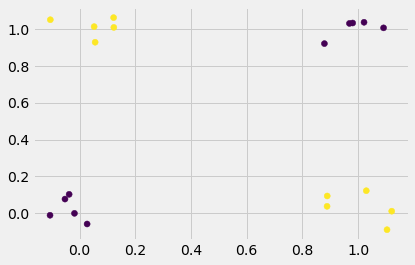

In [9]:
X, y = xor_dataset(5)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(X[:,0], X[:,1], c = y)

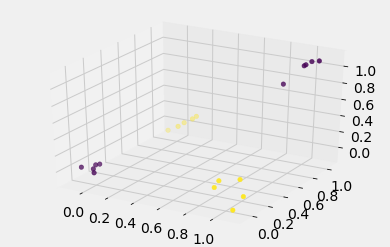

In [10]:
# Add a new feature x1 * x2 after the two features in each example from X.
Xnew = np.column_stack((X, X[:,0]*X[:,1]))

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xnew[:,0], Xnew[:,1], Xnew[:,2], c = y)

In [11]:
# Train the perceptron on the new XOR dataset using the 2 + 1 features.
w_vectors = []
w = train(Xnew, y, 10, w_vectors)
print(w)

[-1.          1.77049791  2.08224457 -4.75410655]


(15, 15)


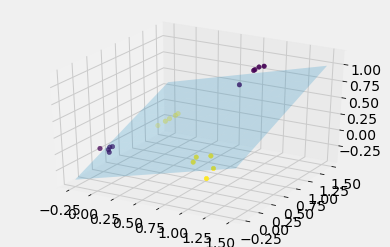

In [12]:
# Display the decision boundary in the original 2D feature space.
xx, yy = np.meshgrid((np.arange(15) - 2) / 8, (np.arange(15) - 2) / 8)
zz = (-w[0] -w[1] * xx - w[2] * yy) / w[3]
print(zz.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xnew[:,0], Xnew[:,1], Xnew[:,2], c = y)
ax.plot_surface(xx, yy, zz, alpha=0.2)

In [13]:
def predict(Xraw):
    # Add the engineered feature, to the right.
    engineered = Xraw[:,0]*Xraw[:,1]
    Xnew = np.column_stack((Xraw, engineered)) 
    
    # Add the bias feature. to the left.
    Xones = np.column_stack((np.ones(len(Xnew)), Xnew))
    
    # Compute prediction vector, where for each example x in Xones the output should be wTx.
    pred = Xones@w
    
    return pred

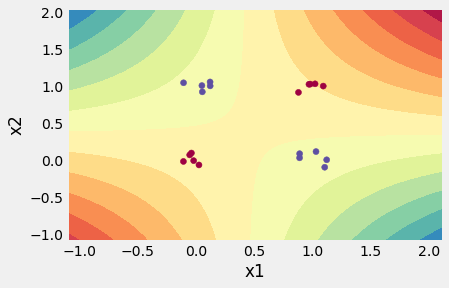

In [14]:
utils.plot_decision_boundary(predict, X.T, y)

## Analysis
Include an analysis of the results that you obtained in the experiments above.

The 3d plot of x1 and x2 Vs the labels with the decision boundary that correctly classifys the points shows that the calculated weight vector is correct. This is further reinforced on the last plot, where the different colors sepreate the 2 linearly sepreable classes.

## Bonus

Anything extra goes here.